In [10]:
################################################
#all the needed imports
#

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import copy
import math

#used for convertting output (64bit -> 32bit -> 8bit values)
import struct
def binary(num, typ = 'd'):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!{}'.format(typ), num))

In [11]:
webcam = cv2.VideoCapture(0)
key = cv2. waitKey(1)

#set maximum wanted resolution - if not reachable, set the closest value
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
webcam.set(cv2.CAP_PROP_GIGA_FRAME_HEIGH_MAX, 720)

width = webcam.get(cv2.CAP_PROP_FRAME_WIDTH)
height = webcam.get(cv2.CAP_PROP_FRAME_HEIGHT)

print("CURRENT RESOLUTION: ", width, ":", height)

arr = []
counter = 0

MAX_IMG = 2

while True:
    try:
        check, frame = webcam.read()
        #print(frame)
        #print(check)
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if(key == ord('q')):
            print("Turning off camera.")
            webcam.release()            #turning off camera
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        elif(key == ord('c')):            #capture 1 frame
            counter = 0
            #arr = np.array(frame)
            print("start")

            #webcam.release()
            #cv2.destroyAllWindows()

            #print(arr.shape)

            #color conversion
            #img = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)

            #img = Image.fromarray(arr, "RGB")

            # fig, axs = plt.subplots(1, 2, figsize=[20,10])
            # axs[0].imshow(arr)
            # axs[1].imshow(img)
            # plt.show()
        
        if(counter >= 0 and counter < MAX_IMG*2+24):
            #print("next", counter)
            if(counter >= 24):
                arr.append(np.array(frame))
                print("appended", counter)
            #webcam.release()
            counter += 1
            
        elif(counter == MAX_IMG*2+24):
            webcam.release()
            cv2.destroyAllWindows()
            break

    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

CURRENT RESOLUTION:  1280.0 : 720.0
appended 24
appended 25
appended 26
appended 27


In [12]:
img = copy.deepcopy(arr)

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
0 done
1 done
2 done
3 done


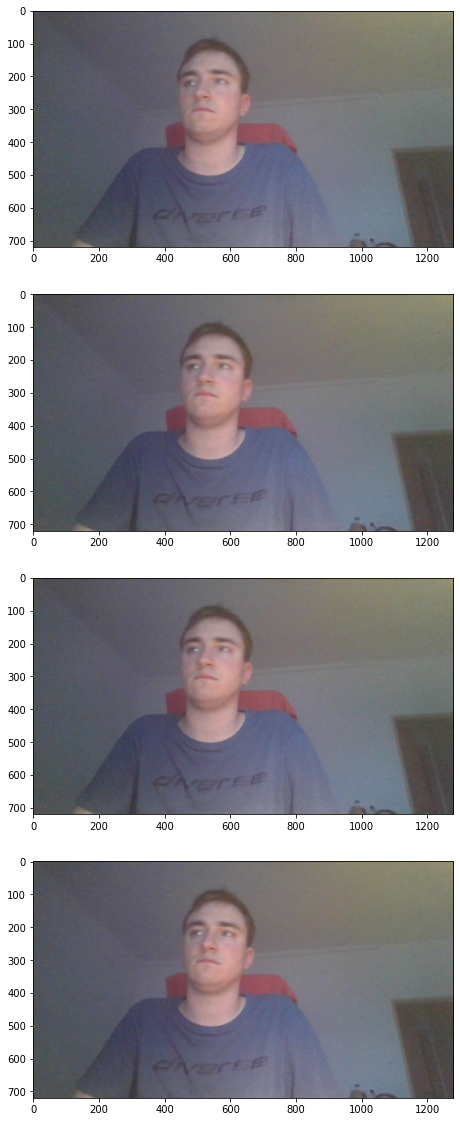

In [13]:
for i in img:
    print(i.shape)

#print(len(img[0]))



for i in range(MAX_IMG*2):
    img[i] = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
    print(i, "done")

########################################
# COLOR CHECKING
#

fig, axs = plt.subplots(MAX_IMG*2, 1, figsize=[20,20])
# temp_R = np.zeros_like(img[3])
# temp_G = np.zeros_like(img[3])
# temp_B = np.zeros_like(img[3])
# temp_R[:,:,0] = img[3][:,:,0]
# temp_G[:,:,1] = img[3][:,:,1]
# temp_B[:,:,2] = img[3][:,:,2]

# axs[0].imshow(img[3])
# axs[1].imshow(temp_R)
# axs[2].imshow(temp_G)
# axs[3].imshow(temp_B)

#
#########################################

counter = 0


for i in img:
    axs[counter].imshow(i)
    counter += 1


plt.show()

In [14]:
#set length of whole array in 1D
len_R = img[0][:,:,0].size
#print(len_R)

m = len_R

arr1D_R1 = []
arr1D_R2 = []
arr1D_G1 = []
arr1D_G2 = []
arr1D_B1 = []
arr1D_B2 = []

redXOR = []
greenXOR = []
blueXOR = []

#for each image pair
for i in range(0, MAX_IMG*2, 2):
    # for each RED pixel
    arr1D_R1.append(img[i][:,:,0].flatten())
    arr1D_R2.append(np.flip(img[i+1][:,:,0].flatten()))
    # for each GREEN pixel
    arr1D_G1.append(img[i][:,:,1].flatten())
    arr1D_G2.append(np.flip(img[i+1][:,:,1].flatten()))
    # for each BLUE pixel
    arr1D_B1.append(img[i][:,:,2].flatten())
    arr1D_B2.append(np.flip(img[i+1][:,:,2].flatten()))

for i in range(MAX_IMG):
    # XOR red values of pair images
    redXOR.append(arr1D_R1[i] ^ arr1D_R2[i])
    print("red_XOR_{}".format(i), redXOR[i])

    # XOR green values of pair images
    greenXOR.append(arr1D_G1[i] ^ arr1D_G2[i])

    # XOR blue values of pair images
    blueXOR.append(arr1D_B1[i] ^ arr1D_B2[i])
    
# create Z array of R^, G^, B^ array elements interlaced as Z = {r^0, g^0, b^0, r^1, g^1, b^1, ..., r^n-1, g^n-1, b^n-1}, where length = 3n
Z = []

for i in range(MAX_IMG):
    aux = []
    #iterate with "it" over all redXOR/greenXOR/blueXOR arrays AND concatenate each element at [it] position as in pattern shown ^here^
    for it in range(len(redXOR[i])):
        aux.append(redXOR[i][it])
        aux.append(greenXOR[i][it])
        aux.append(blueXOR[i][it])
    Z.append(aux)


print(len(Z[0]))



# arr1D_R2 = img[i][:,:,0].flatten()

    
# print("REG ", end="")
# for i in range(3):
#     print(arr1D_R1[i], end=" ")
# print(" ... ", end="")
# for i in reversed(range(3)):
#     print(arr1D_R1[len(arr1D_R1)-i-1], end=" ")
# print("")
# print("FLAT", arr1D_R2)

# print("REVERSED:", np.flip(arr1D_R2))

red_XOR_0 [14 12 12 ... 14 14 12]
red_XOR_1 [13 14 15 ... 27 25 26]
2764800


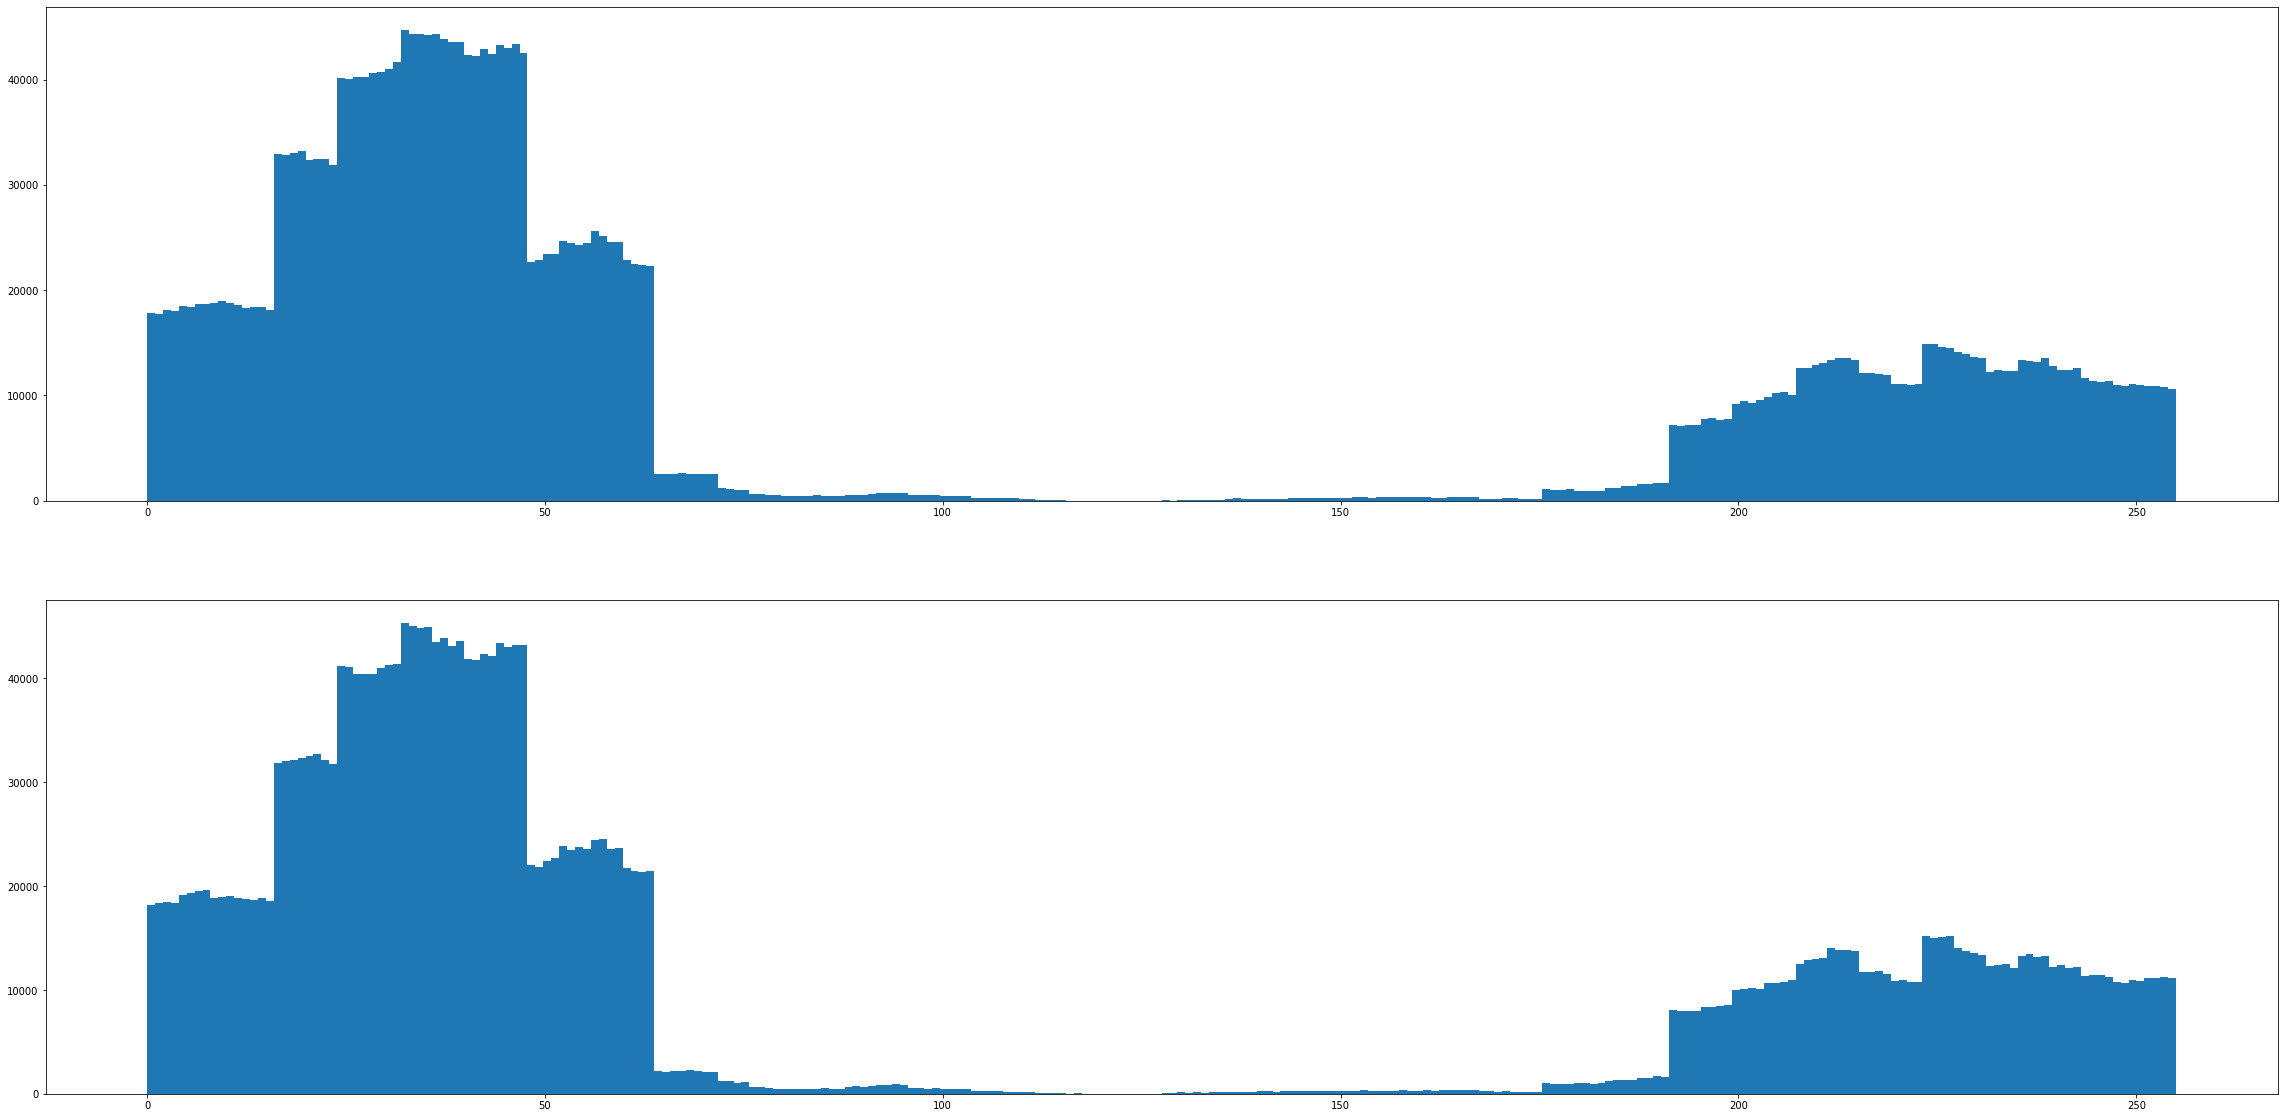

In [15]:
fig, axs = plt.subplots(MAX_IMG, 1, figsize=[MAX_IMG*20,20])
for i in range(MAX_IMG):
    axs[i].hist(Z[i], 256)

    

In [16]:
#POST-PROCESSING_MODIFIED_LOGISTIC_MAP_ALGORITHM

'''
"Based on the results of statistical testing, the size of the CCML is set to
L = 6 to achieve a balance between performance and statistical quality of the generated
random numbers. If the available data is not a multiple of 6, values from the beginning of
the dataset will be repeated. 
--> Each logistic map is iterated 50 times to eliminate transient effects." ~4.4 Postprocessing (s. 6)
'''
L = 6
MAX_T = 50

'''
Initial control parameters - r^i_0 = 3.9 <-- set to ensure that the logistic maps operate
within their chaotic region.
'''
r = []
for i in range(MAX_T):
    r.append([])

for i in range(L):
    r[0].append(np.float64(3.9))

'''
"For further entropy amplification, the control parameters will be recalculated as

    r^i_t = r^i_t + 0.001*x^i_t + c,                                        (6)

where c is a small constant. Any arbitrary value for c within the range of [0.001, 0.005]
can be chosen, but c = 0.002 was chosen for the implementation of the TRNG in this paper.
The value of c ensures that r^i_t will be modified even though x^i_t ~= 0. If a situation
arises where r^i_t > 4 after computing (6), it will be further recalculated as

    r^i_t = 3.9 + 0.0025*r^i_t,                                             (7)

which prevents the logistic maps from being iterated out of scope."
'''

def logisticMap(x, r, c):
    #x <- need to be deepcopy

    if(x == 0):
        x = r/4
    
    r = r + 0.001 * x + c
    if(r > 4):
        r = 3.9 + 0.0025 * r 
    
    for i in range(MAX_T):
        x = r * x * (1 - x)

    return x, r

In [27]:
print(len(Z[0]))

2764800


In [28]:
#POST-PROCESSING_SETTING_VALUES_CCML

c = np.float64(0.002)

x = []                         #initial call for x^i_0 where i = {0, L-1}

epsilon = np.float64(0.5)       # "The coupling coefficient is set to 0.5 to ensure that the current chaotic state 

out = []
mask = np.int64(0xFFFFFFFF)                             #mask that covers 32 LSBs       <-- for extracting LSB part

tempCounter = 0

for it in range(MAX_IMG):
    out.append([])          #append new subarray

    #for each new image pair - set helping array's values
    r = []
    for i in range(L):
        r.append(np.float64(3.9))

    j = 0

    counter = 0

    #for better performance - count MIN and MAX once
    minZ = min(Z[it])
    maxZ = max(Z[it])

    while(j < len(Z[it])):                   #while(j < len(Z[it]))
        x = []
        for i in range(math.floor(L/2+1)):
            x.append([])

        # Normalization based on formula presented in (5)
        for i in range(L):
            auxVar = np.float64((Z[it][i+j] - minZ) / (maxZ - minZ))
            x[0].append(auxVar)

        # Iterate CCML for full diffusion
        for t in range(math.floor(L/2)):
            #print("t", t)
            # Loop for each local map
            for i in range(L):
                #print("i", i)
                #print(r[1][0])
                xLog1, r[i] = logisticMap(x[t][i], r[i], c)
                xLog2, r[(i+1)%L] = logisticMap(x[t][(i+1)%L], r[(i+1)%L], c)
                xLog3, r[(i-1)%L] = logisticMap(x[t][(i-1)%L], r[(i-1)%L], c)

                auxVar = epsilon * xLog1 + (epsilon/2) * (xLog2 + xLog3)
                x[t+1].append(np.float64(auxVar))

            #print("x_{}: ".format(t), x)
            #print("r_{}".format(t), r)

        for i in range(L):
            # Perform operation: 32-bit MSB XOR 32-bit LSB          <-- MSB/LSB - most/least significant bits
            #print(out)
            aux = np.int64(int(binary(x[math.floor(L/2-1)][i], 'd'), 2))
            
            #extract Most Significant Bits
            auxM = np.int32(aux >> 32)
            #extract Least Significant Bits
            auxL = np.int32(aux)
            outT = auxM ^ auxL                                   #XOR operation on 32bit int
            #foreach 8bit part of out extract 8bit value and append to output array
            out[it].append(np.uint8(outT >> 24))
            out[it].append(np.uint8(outT >> 16))
            out[it].append(np.uint8(outT >> 8))
            out[it].append(np.uint8(outT))

        counter += 1
        if(counter%10000 == 0):
            print(counter)
        j += L

print(np.shape(out))
#print(x)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
(2, 11059200)


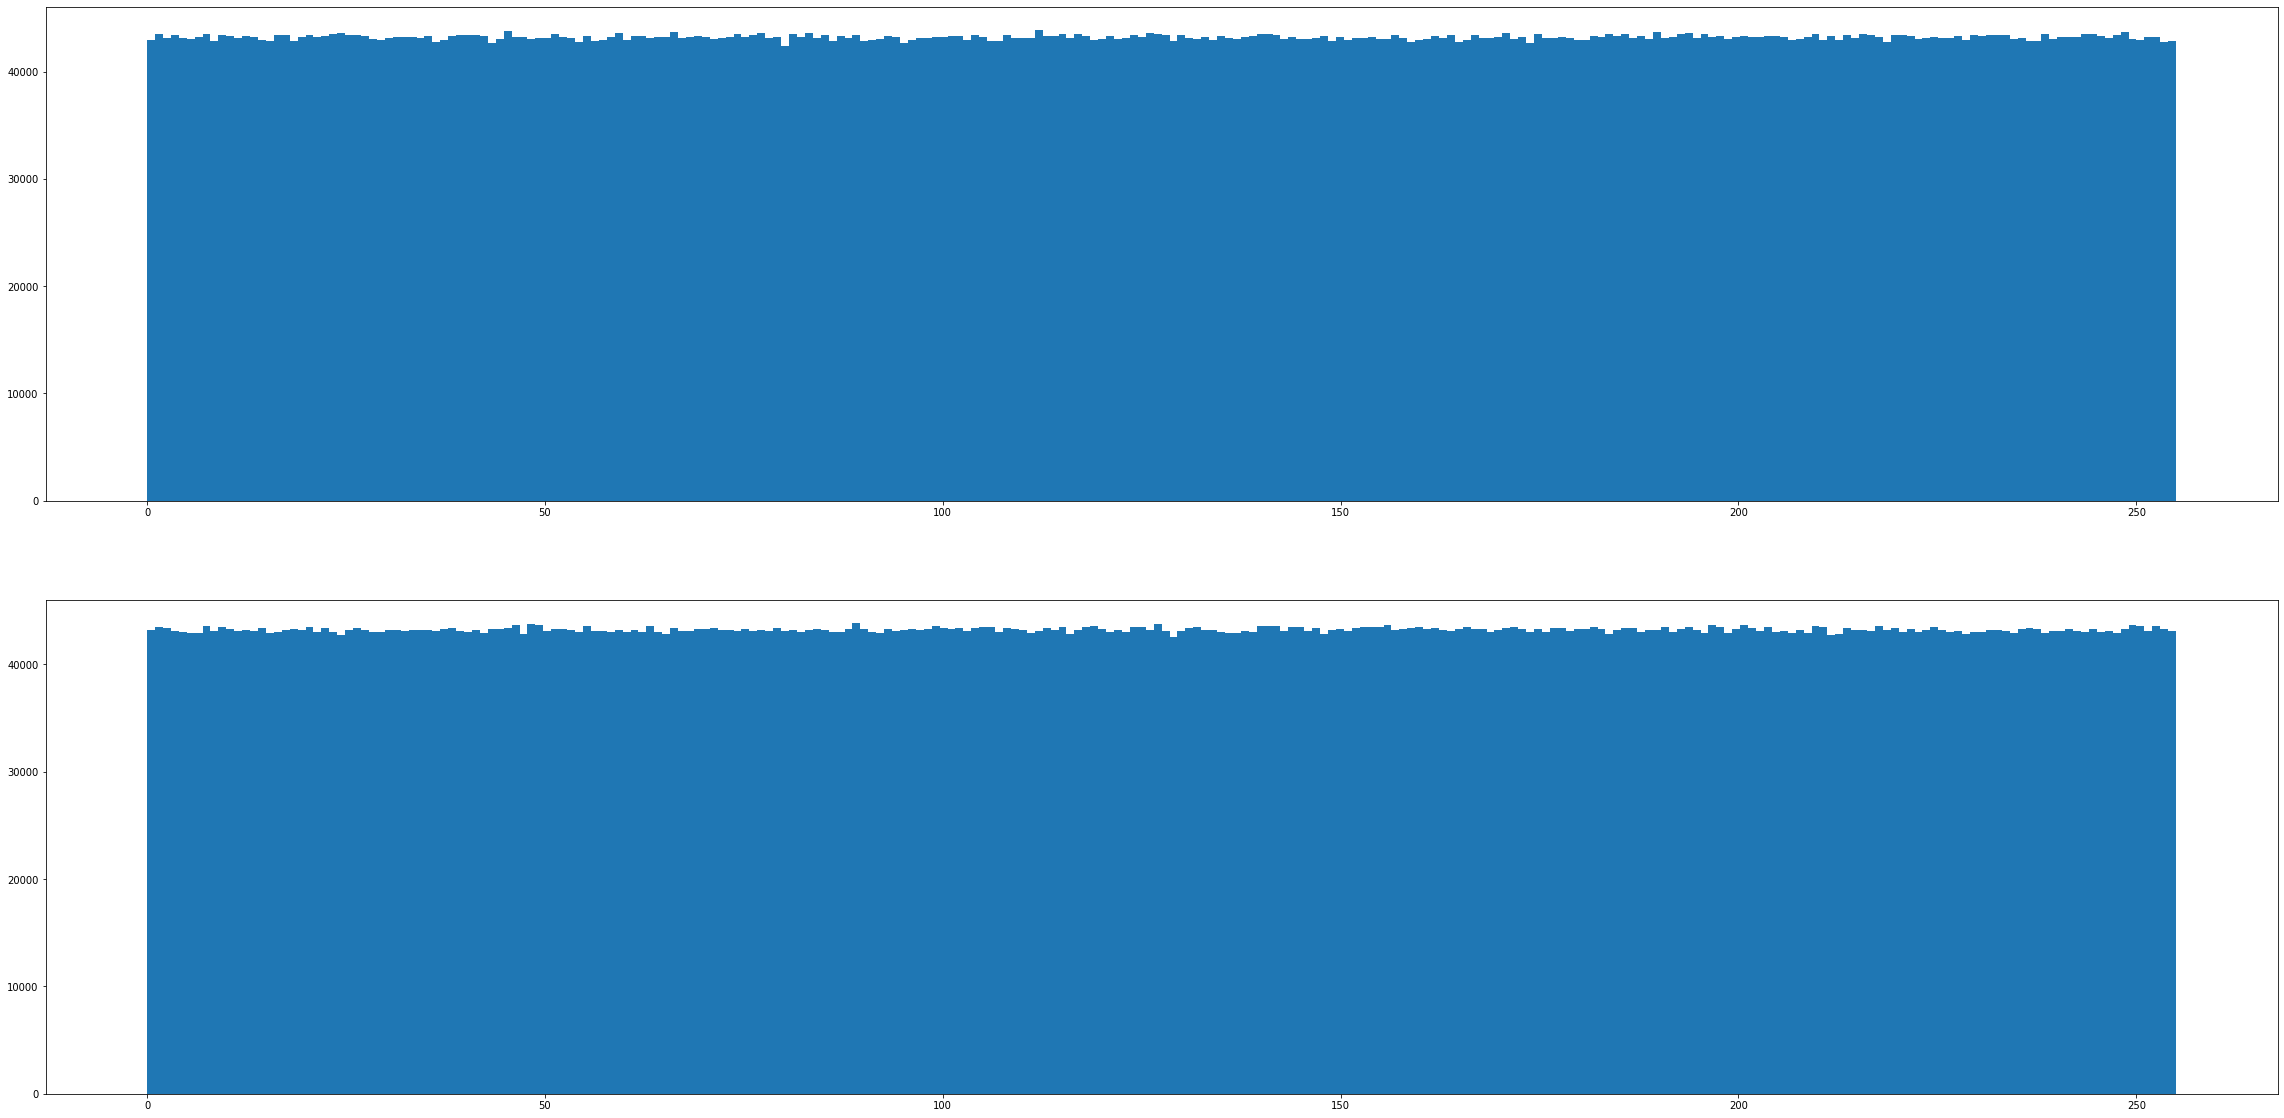

In [29]:
fig, axs = plt.subplots(MAX_IMG, 1, figsize=[MAX_IMG*20,20])
for i in range(MAX_IMG):
    axs[i].hist(out[i], 256)

<h2>Testowanie operacji BITWISE</h2>

In [ ]:
output = []

#only for testing - how long to calculate
import time

#only for testing - randomize number...
#randomize array of floats [0;1)
var = np.array(var, dtype=np.dtype(np.float64()))
var = np.random.random(30)

#print(binary(var[0], 'd'))

for i in range(10):
    #start timeCount
    start = time.time()

    mask = np.int64(0xFFFFFFFF)                             #mask that covers 32 LSBs       <-- for extracting LSB part

    for it in var:
        aux = np.int64(int(binary(it, 'd'), 2))
        # print("old", binary(it, 'd'))
        # print("new", binary(aux, 'q'))                  #binary the same

        #extract Most Significant Bits
        auxM = np.int32(aux >> 32)
        #extract Least Significant Bits
        auxL = np.int32(aux)
        out = auxM ^ auxL                                   #XOR operation on 32bit int
        # print("full", binary(aux, 'q'))
        # print("auxM", binary(auxM, 'i'))
        # print("auxL", binary(auxL, 'i'))
        # print("out ", binary(out, 'i'))
        # print("out1", binary(np.uint8(out >> 24), 'B'))
        # print("out2", binary(np.uint8(out >> 16), 'B'))
        # print("out3", binary(np.uint8(out >> 8), 'B'))
        # print("out4", binary(np.uint8(out), 'B'), end='\n\n')

        #foreach 8bit part of out extract 8bit value and append to output array
        output.append(np.uint8(out >> 24))
        output.append(np.uint8(out >> 16))
        output.append(np.uint8(out >> 8))
        output.append(np.uint8(out))

    stop = time.time()

    print("time elapsed {}: ".format(i+1) + str(stop - start))
    

# fig, axs = plt.subplots(1, 1, figsize=[10,5])
# axs.hist(output, 256)


# aux = np.int64(int(binary(var[0], 'd'), 2))
# print(binary(aux, 'q'))                 #'q' is a long long (integer but 64bit)


# strict32 = np.int32(aux)
# print(binary(strict32, 'i'))
# masked32 = np.int32(aux & 0xFFFFFFFF)                   #it HAS to be int32, because when "uint" there is error about forbidden use of bitwise_and on "uint"
# print(binary(masked32, 'i'))

# print(binary(strict32, 'i'))
# print(strict32)


# int8 = np.uint8(strict32 >> 24)
# print(binary(int8, 'b'))


#get number (64bit float)

#prepare it
#XOR 32bit
#then save to 8bit

out_8 = np.array(var, dtype=np.dtype(np.float64()))